# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [50]:
df = pd.read_csv('../data/states_edu.csv')
df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [51]:
print(df["YEAR"].nunique())

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [52]:
michigan = df[df["STATE"] == "MICHIGAN"]
ohio = df[df["STATE"] == "OHIO"]

print("Michigan" if michigan["AVG_MATH_4_SCORE"].mean() > ohio["AVG_MATH_4_SCORE"].mean() else "Ohio" + " has the highest average year 4 math score.")
print("Michigan" if michigan["AVG_READING_4_SCORE"].mean() > ohio["AVG_READING_4_SCORE"].mean() else "Ohio" + " has the highest average year 4 reading score.")
print("Michigan" if michigan["AVG_MATH_8_SCORE"].mean() > ohio["AVG_MATH_8_SCORE"].mean() else "Ohio" + " has the highest average year 8 math score.")
print("Michigan" if michigan["AVG_READING_8_SCORE"].mean() > ohio["AVG_READING_8_SCORE"].mean() else "Ohio" + " has the highest average year 8 reading score.")

#accidentally did all the tests...

Ohio has the highest average year 4 math score.
Ohio has the highest average year 4 reading score.
Ohio has the highest average year 8 math score.
Ohio has the highest average year 8 reading score.


Find the average for your chosen test across all states in 2019

In [53]:
print(df["AVG_MATH_4_SCORE"].mean())


236.32743362831857


For each state, find a maximum value for your chosen test score

In [54]:
states = df.groupby("STATE")
print(states["AVG_MATH_4_SCORE"].max())

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [55]:
# Calculate the score increase by year for each state
df['scoreIncreaseByYear'] = df.groupby('STATE')['AVG_MATH_4_SCORE'].diff()

# Now group by 'STATE' and calculate the mean of 'scoreIncreaseByYear'
avg_score_increase = df.groupby('STATE')['scoreIncreaseByYear'].mean()
print(avg_score_increase)



STATE
ALABAMA                -2.000000
ALASKA                  2.000000
ARIZONA                 4.000000
ARKANSAS               -1.000000
CALIFORNIA              3.000000
COLORADO                1.000000
CONNECTICUT             4.000000
DELAWARE                3.000000
DISTRICT_OF_COLUMBIA    4.000000
DODEA                   1.625000
FLORIDA                 0.000000
GEORGIA                 2.000000
HAWAII                  1.000000
IDAHO                   2.000000
ILLINOIS               -1.000000
INDIANA                -2.000000
IOWA                   -2.000000
KANSAS                 -2.000000
KENTUCKY                0.000000
LOUISIANA               2.000000
MAINE                   1.000000
MARYLAND               -2.000000
MASSACHUSETTS          -2.000000
MICHIGAN                0.000000
MINNESOTA              -1.000000
MISSISSIPPI             6.000000
MISSOURI               -2.000000
MONTANA                 0.000000
NATIONAL                1.444444
NEBRASKA               -2.000000
NEVA

Feature engineering justification: I thought it would be helpful to see which state is increasing their scores most significantly. This way, other, less successful states, can learn to follow in their footsteps.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

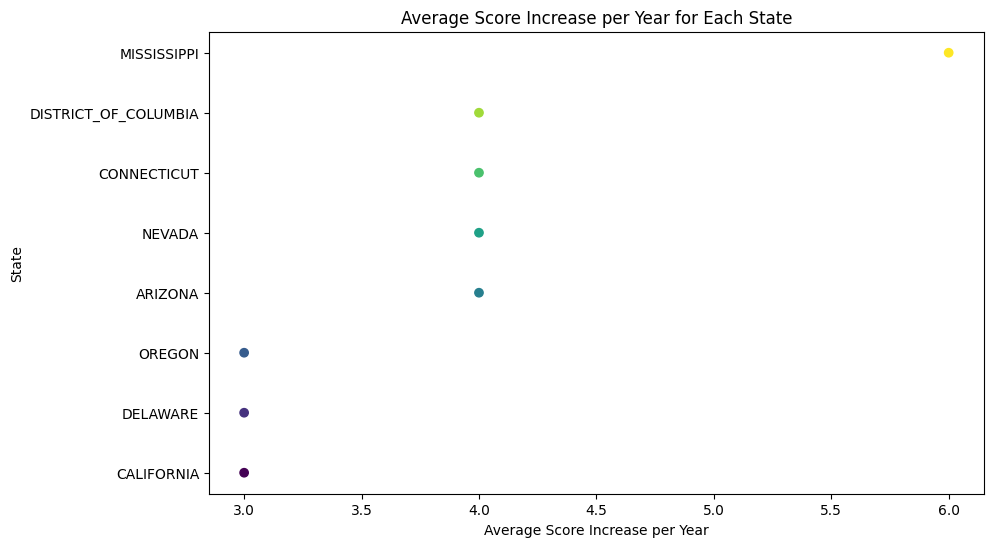

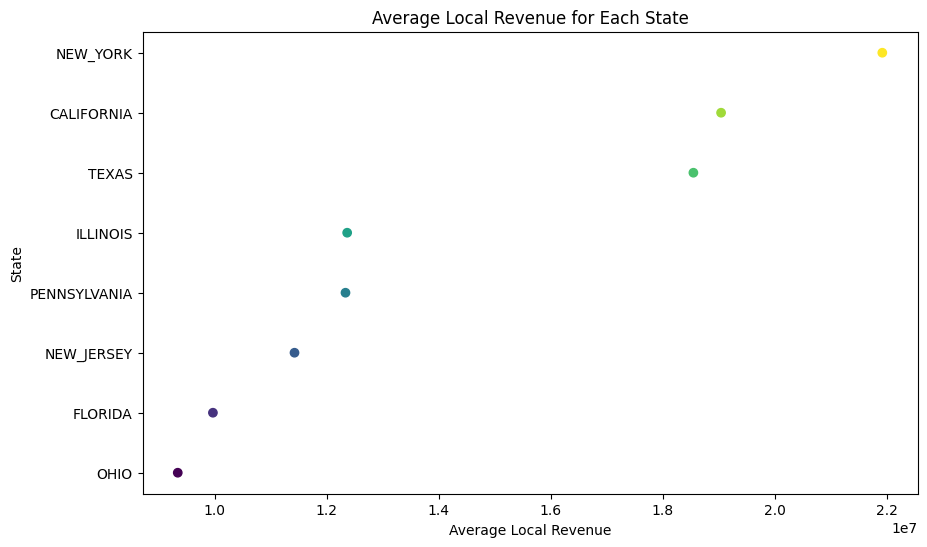

In [56]:
# Calculate the average local revenue for each state
localRevenue = df["LOCAL_REVENUE"].groupby(df["STATE"]).mean()

# Merge avg_score_increase with localRevenue
avg_score_increaseLocalRev = pd.concat([avg_score_increase, localRevenue], axis=1).dropna()
avg_score_increaseLocalRev.columns = ['avg_score_increase', 'localRevenue']

# Plot 1: Average Score Increase per Year for Each State
plt.figure(figsize=(10, 6))
selected_states1 = avg_score_increase.sort_values(ascending=True).tail(8) 
colors1 = plt.cm.viridis(np.linspace(0, 1, len(selected_states1)))
plt.scatter(selected_states1.values, selected_states1.index, c=colors1)
plt.ylabel('State')
plt.xlabel('Average Score Increase per Year')
plt.title('Average Score Increase per Year for Each State')
plt.show()

# Plot 2: Average Score Increase per Year and Local Revenue
plt.figure(figsize=(10, 6))
selected_states2 = avg_score_increaseLocalRev.sort_values(by='localRevenue', ascending=True).tail(8) 
colors2 = plt.cm.viridis(np.linspace(0, 1, len(selected_states2)))
plt.scatter(selected_states2['localRevenue'], selected_states2.index, c=colors2)
plt.ylabel('State')
plt.xlabel('Average Local Revenue')
plt.title('Average Local Revenue for Each State')
plt.show()


The above graph shows which states are increasing their students' scores the most, on average.

**Visualization 2**

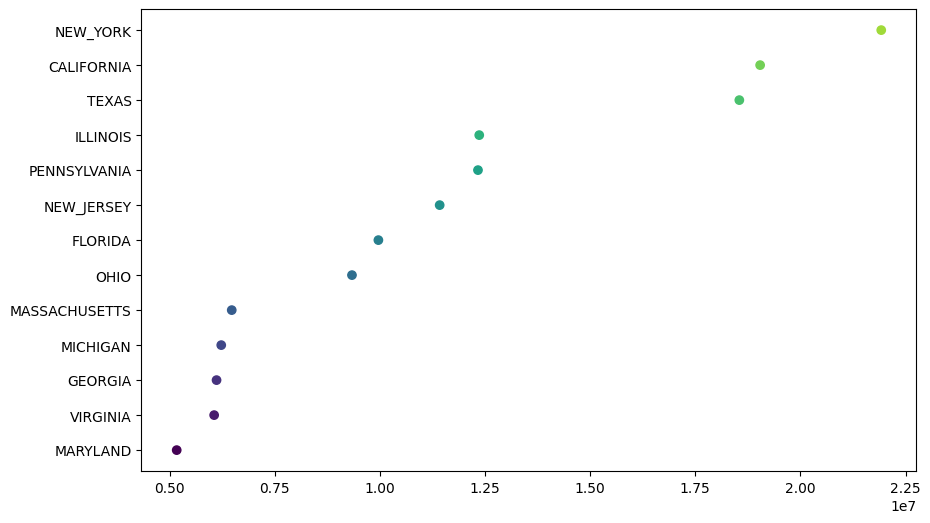

In [57]:
localRevenue = df["LOCAL_REVENUE"].groupby(df["STATE"]).mean()

selectedValues = localRevenue.sort_values(ascending=True).tail(15)
colors = plt.cm.viridis(np.linspace(0, 1, len(selectedValues)))  # Define colors
plt.figure(figsize=(10, 6))
plt.scatter(selectedValues.values, selectedValues.index, c=colors)
plt.show()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [58]:

from sklearn.model_selection import train_test_split

In [59]:
X = df["LOCAL_REVENUE"].groupby(df["STATE"]).mean()
y = df['scoreIncreaseByYear'].groupby(df["STATE"]).mean()


In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [61]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [62]:
# create your model here
model = LinearRegression()

In [63]:
# Drop samples with missing values
X_train_clean = X_train.dropna().values.reshape(-1, 1)
y_train_clean = y_train.dropna()

model.fit(X_train_clean, y_train_clean)


LinearRegression()

In [64]:
y_pred = model.predict(X_train_clean)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
X_test_clean = X_test.dropna().values.reshape(-1, 1)
y_test_clean = y_test[X_test.dropna().index].dropna()

# Calculate predictions
y_test_pred = model.predict(X_test_clean)

# Calculate metrics
mae = mean_absolute_error(y_test_clean, y_test_pred)
mse = mean_squared_error(y_test_clean, y_test_pred)
r2 = r2_score(y_test_clean, y_test_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.8967223472817942
Mean Squared Error (MSE): 5.872928972729847
R-squared (R²): -0.38253775428076153


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

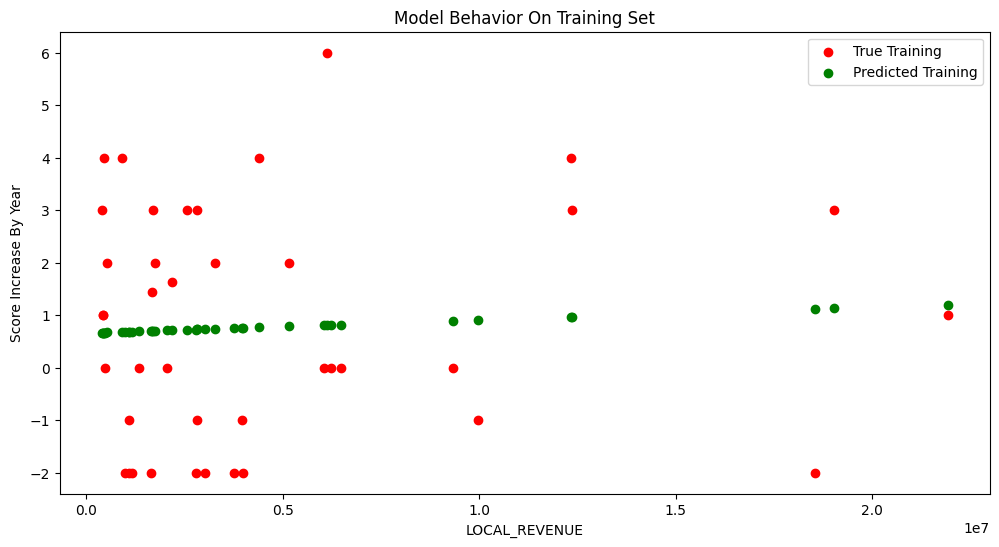

In [70]:
col_name = 'LOCAL_REVENUE'

# Align indices of X_train_clean and y_train
aligned_indices = X_train_clean.reshape(-1).argsort()
X_train_clean_aligned = X_train_clean[aligned_indices]
y_train_aligned = y_train.iloc[aligned_indices]

f = plt.figure(figsize=(12, 6))
plt.scatter(X_train_clean_aligned, y_train_aligned, color="red")
plt.scatter(X_train_clean_aligned, model.predict(X_train_clean_aligned), color="green")

plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Score Increase By Year')
plt.title("Model Behavior On Training Set")
plt.show()

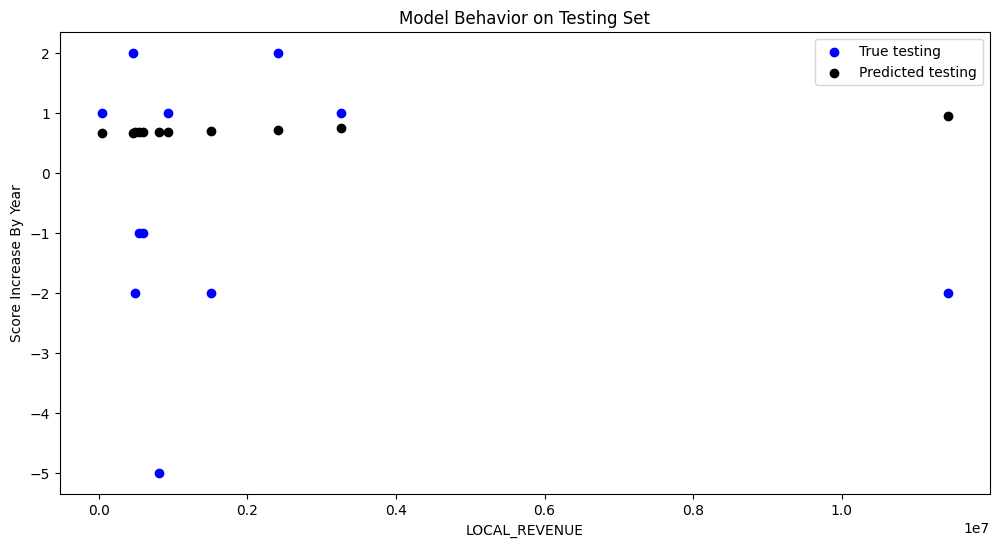

In [71]:
col_name = 'LOCAL_REVENUE'

f = plt.figure(figsize=(12, 6))
plt.scatter(X_test_clean, y_test_clean, color="blue")
plt.scatter(X_test_clean, y_test_pred, color="black")

plt.legend(['True testing', 'Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Score Increase By Year')
plt.title("Model Behavior on Testing Set")
plt.show()